<a href="https://colab.research.google.com/github/MukunthanPeriyasamy/Deep_Learning_Projects/blob/main/Age_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Input
from tensorflow.keras.models import Sequential
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mimg

In [3]:
import zipfile

files = zipfile.ZipFile('/content/archive (5).zip')
files.extractall()

# View Random Image function

In [4]:
train_dir_image = 'train/'

def view_random_image(image_category):
  image_path = train_dir_image + image_category

  list_image = os.listdir(image_path)
  random_image = random.choice(list_image)

  image_path_join = os.path.join(image_path,random_image)

  img = mimg.imread(image_path_join)
  plt.imshow(img)
  plt.axis('off')


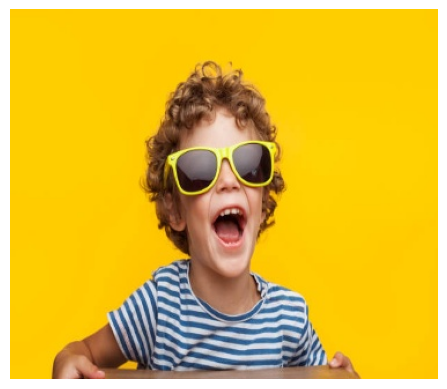

In [5]:
view_random_image('children')

# Function for visualizing the loss curve of the model

In [6]:
def view_loss_curve(model_history):

  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  accuracy = model_history.history['accuracy']
  val_accuracy = model_history.history['val_accuracy']

  plt.plot(range(len(loss)),loss,label = 'loss')
  plt.plot(range(len(loss)),val_loss,label = 'val_loss')
  plt.title('Loss')
  plt.legend(loc='upper right')

  plt.figure()
  plt.plot(range(len(accuracy)),accuracy,label='accuracy')
  plt.plot(range(len(accuracy)),val_accuracy,label='val_accuracy')
  plt.title('Accuracy')
  plt.legend(loc='lower right')

# Image Data Processing

In [7]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [8]:
train_dir = 'train/'
test_dir = 'test/'

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

test_data = train_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 680 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


# Training the Model (Model Building)

In [10]:
model_1 = Sequential([
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(2,activation='softmax')
])

model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_1 = model_1.fit(
    train_data,
    validation_data = test_data,
    epochs = 5
)

Epoch 1/5
22/22 [==============================] - 33s 1s/step - loss: 0.7034 - accuracy: 0.5235 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 2/5
22/22 [==============================] - 31s 1s/step - loss: 0.6883 - accuracy: 0.5735 - val_loss: 0.6643 - val_accuracy: 0.5667
Epoch 3/5
22/22 [==============================] - 30s 1s/step - loss: 0.6331 - accuracy: 0.6471 - val_loss: 0.6684 - val_accuracy: 0.6417
Epoch 4/5
22/22 [==============================] - 30s 1s/step - loss: 0.5550 - accuracy: 0.7235 - val_loss: 0.6607 - val_accuracy: 0.5667
Epoch 5/5
22/22 [==============================] - 30s 1s/step - loss: 0.4745 - accuracy: 0.7838 - val_loss: 0.7337 - val_accuracy: 0.5750


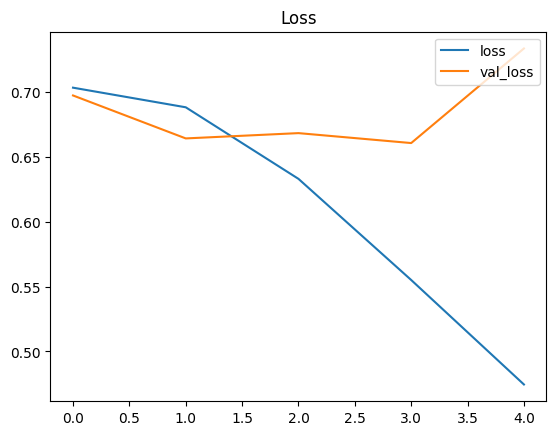

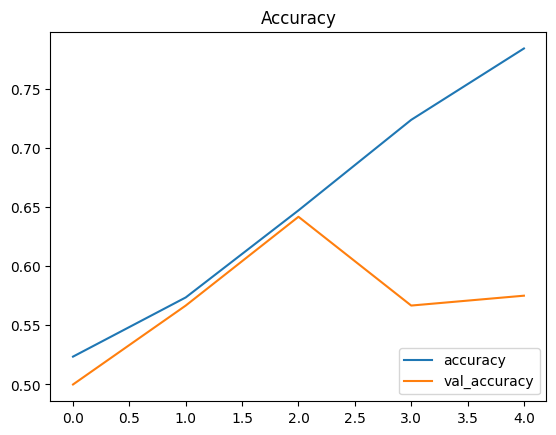

In [12]:
view_loss_curve(history_1)

In [17]:
## Image agumentation for tarining data

train_data_agumentation = ImageDataGenerator(
    rescale = 1/255,
    zoom_range = 0.2,
)

train_data_agumented = train_data_agumentation.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 680 images belonging to 2 classes.


In [18]:
model_2 = Sequential([
    Input(shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(2,activation='softmax')
])

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_2= model_2.fit(
    train_data_agumented,
    validation_data = test_data,
    epochs = 5
)

Epoch 1/5
22/22 [==============================] - 33s 1s/step - loss: 0.7325 - accuracy: 0.5132 - val_loss: 0.6934 - val_accuracy: 0.5083
Epoch 2/5
22/22 [==============================] - 32s 1s/step - loss: 0.6884 - accuracy: 0.5412 - val_loss: 0.6858 - val_accuracy: 0.5583
Epoch 3/5
22/22 [==============================] - 31s 1s/step - loss: 0.6835 - accuracy: 0.5500 - val_loss: 0.6737 - val_accuracy: 0.5833
Epoch 4/5
22/22 [==============================] - 31s 1s/step - loss: 0.6840 - accuracy: 0.5485 - val_loss: 0.6866 - val_accuracy: 0.5417
Epoch 5/5
22/22 [==============================] - 31s 1s/step - loss: 0.6672 - accuracy: 0.6279 - val_loss: 0.6528 - val_accuracy: 0.6083


In [75]:
model_2.evaluate(test_data)

4/4 [==============================] - 1s 335ms/step - loss: 0.6528 - accuracy: 0.6083


[0.6528197526931763, 0.6083333492279053]

In [43]:
model_1.evaluate(test_data)

4/4 [==============================] - 1s 272ms/step - loss: 0.7337 - accuracy: 0.5750


[0.7336548566818237, 0.574999988079071]

# Model Prediction

In [94]:
import numpy as np

def prediction(image):
  img = image / 255

  resize_image = tf.image.resize(img,(224,224))
  image_pred = tf.expand_dims(resize_image,axis=0)
  pred = model_1.predict(image_pred)
  list_value = os.listdir('train/')
  output = np.argmax(pred)
  print(pred)
  print(list_value[output])

(-0.5, 948.5, 767.5, -0.5)

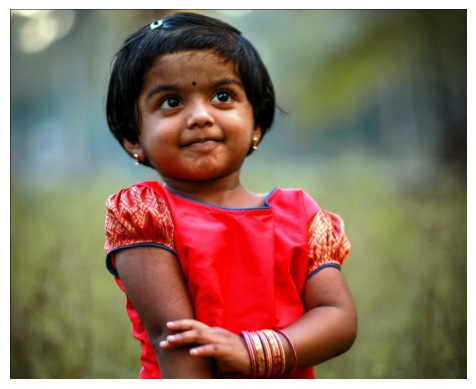

In [89]:
image = '/content/Girl-child.jpg'
image = mimg.imread(image)
plt.imshow(image)
plt.axis('off')

In [95]:
prediction(image)

1/1 [==============================] - 0s 27ms/step
[[0.1743188 0.8256812]]
children


🔑 **Note:** In our case model_1 performance is better than model_2. So we are going to stick with model_1